In [1]:
import networkx as nx
from salesman.solver.graph import NDGraph
import matplotlib.pyplot as plt
import numpy as np

In [2]:
graph = NDGraph.watts_strogatz(30, 1, 10)
G = nx.Graph()
for edge in graph.edges:
    G.add_edge(edge.source, edge.target, weight=edge.length)

{<NDNode name=22>: Text(-0.017357062213033885, 2.6419154659660378, '<NDNode name=22>'),
 <NDNode name=23>: Text(-3.235871583896848, 6.517005001692631, '<NDNode name=23>'),
 <NDNode name=8>: Text(-0.3672197313541437, -5.815706467415735, '<NDNode name=8>'),
 <NDNode name=9>: Text(1.6714420471028681, -1.3506726821933166, '<NDNode name=9>'),
 <NDNode name=15>: Text(-2.123877244941548, -3.9195122812407157, '<NDNode name=15>'),
 <NDNode name=16>: Text(1.191540972266637, -1.6170738016552557, '<NDNode name=16>'),
 <NDNode name=26>: Text(-7.366164597520237, -3.036999384454701, '<NDNode name=26>'),
 <NDNode name=28>: Text(-2.334067337627787, -3.6567225656028377, '<NDNode name=28>'),
 <NDNode name=14>: Text(5.059838440568576, -1.8561601965120513, '<NDNode name=14>'),
 <NDNode name=5>: Text(6.998538355982783, 1.4079300048484655, '<NDNode name=5>'),
 <NDNode name=7>: Text(5.193109944283741, -5.178467387366458, '<NDNode name=7>'),
 <NDNode name=18>: Text(0.5571776438900051, 3.325967841746323, '<NDNo

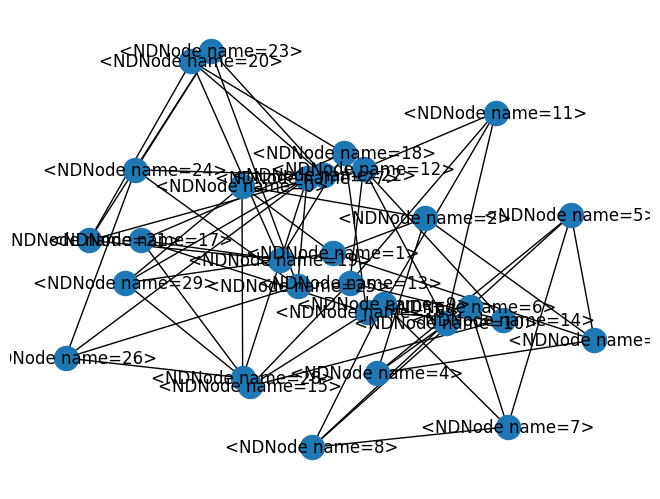

In [6]:
layout = graph.get_spring_layout(k = 1e-1, max_iterations=1000)
nx.draw(G, layout)
nx.draw_networkx_labels(G, layout)